<a href="https://colab.research.google.com/github/cds-group-8/cds-group-8.github.io/blob/main/Shruti's_M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
###########################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from scipy.linalg import lstsq  # For normal equation
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
dfHr=pd.read_csv("hour.csv")

print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
dfHr.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
dfHr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [ ]:
# YOUR CODE HERE
#Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing
df=dfHr[['hr','cnt']]
#Create histogram fron df
#plt.figure(figsize=(10, 6))
#sns.histplot(df, bins=24, kde=False, color='blue')
#sns.lineplot(data=df['hr'].value_counts(sort=False), marker='o', color='red')

#Now dividing the hr into different times
#df['time_period'] = pd.cut(df['hr'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
#sns.countplot(x='time_period', data=df, palette='viridis')

df
fig = px.bar(df, x='hr', y='cnt', title='Bicycle Count Through 24 Hours of the Day',
             labels={'hr': 'Hour of the Day', 'cnt': 'Bicycle Count'})

fig.show()
fig = px.histogram(df, x="hr", y="cnt")
fig.show()


#### Visualize the distribution of count, casual and registered variables

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
df_long = pd.melt(dfHr, id_vars=[], value_vars=['cnt','registered', 'casual'],
                  var_name='user_type', value_name='bicycle_count')

# Create histogram to compare the distributions of registered and non-registered users
fig = px.histogram(df_long, x='bicycle_count',color='user_type', barmode='overlay',
                   title="Comparison of Bicycle Count Distribution by User Type",
                   labels={'bicycle_count': 'Bicycle Count', 'user_type': 'User Type'})
fig.update_layout(yaxis_title="Frequency")
fig.show()

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
# Histogram for Casual Variable
fig = go.Figure(data=[go.Histogram(x=dfHr['casual'])])

fig.update_layout(title_text='Histogram of Casual Bookings',
                  xaxis_title_text='Number of Casual Bookings',
                  yaxis_title_text='Frequency')


fig.show()

fig = go.Figure(data=[go.Histogram(x=dfHr['registered'])])

fig.update_layout(title_text='Histogram of Registered Bookings',
                  xaxis_title_text='Number of Registered Bookings',
                  yaxis_title_text='Frequency')


fig.show()

fig = go.Figure(data=[go.Histogram(x=dfHr['cnt'])])

fig.update_layout(title_text='Histogram of Total Bookings',
                  xaxis_title_text='Number of Total Bookings',
                  yaxis_title_text='Frequency')


fig.show()

#### Describe the relation of weekday, holiday and working day

In [ ]:
# YOUR CODE HERE
# Select the relevant features and target variable
#df_holiday = pd.melt(dfHr, id_vars=['holiday'], value_vars=['weekday', 'workingday'],
                     #var_name='day_type', value_name='day_value')
#df_holiday

filtered_df = dfHr[(dfHr['holiday'] == 1) ]
result_df = filtered_df[['weekday','workingday']]  # Select 'weekday' and copy
result_df.index = filtered_df['holiday']  # Set 'holiday' as index
result_df.index.name = 'holiday'  # Name the index
result_df['weekday'].value_counts()
result_df['workingday'].value_counts()

aggregated_df = dfHr.groupby(['weekday', 'workingday'])['holiday'].sum().reset_index()

fig = px.bar(aggregated_df,
                  x='weekday',
                  y=['holiday'],
                  #y=['holiday', 'non_holiday'],  # Assuming you create a 'non_holiday' column
                  facet_col='workingday',
                  title='Working Day and Holiday Distribution by Weekday (Stacked)',
                  labels={'weekday': 'Weekday', 'value': 'Count', 'workingday': 'Working Day'},
                  category_orders={'weekday': [0, 1, 2, 3, 4, 5, 6]})

                  #hover_data={'holiday_counts':True, 'non_holiday_counts':True}

fig.update_traces(hovertemplate='Holiday Count: %{y} <br>')  # Access second y-value)

fig.show()


In [ ]:
# Filter data for Saturday and Sunday
weekend_data = dfHr[(dfHr['weekday'] == 0) | (dfHr['weekday'] == 6)]

# Group by weekday and sum cycle count
weekend_cycle_count = weekend_data.groupby('weekday')['cnt'].sum()

# Print the results
print(weekend_cycle_count)

#The count does not seem right

weekday
0    444027
6    477807
Name: cnt, dtype: int64


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE

# Filter data for 2011 and 2012
df_2011 = dfHr[dfHr['yr'] == 0]
df_2012 = dfHr[dfHr['yr'] == 1]

# Aggregate data by month
monthly_data_2011 = df_2011.groupby('mnth')[['casual', 'registered']].sum().reset_index()
monthly_data_2012 = df_2012.groupby('mnth')[['casual', 'registered']].sum().reset_index()

# Create traces for 2011
trace1_2011 = go.Bar(name='Casual', x=monthly_data_2011['mnth'], y=monthly_data_2011['casual'])
trace2_2011 = go.Bar(name='Registered', x=monthly_data_2011['mnth'], y=monthly_data_2011['registered'])

# Create traces for 2012
trace1_2012 = go.Bar(name='Casual', x=monthly_data_2012['mnth'], y=monthly_data_2012['casual'])
trace2_2012 = go.Bar(name='Registered', x=monthly_data_2012['mnth'], y=monthly_data_2012['registered'])

# Create figures for 2011 and 2012
fig_2011 = go.Figure(data=[trace1_2011, trace2_2011])
fig_2012 = go.Figure(data=[trace1_2012, trace2_2012])

# Update layouts for stacked bars and titles
fig_2011.update_layout(barmode='stack', title_text='Monthly Count of Casual and Registered Bookings (2011)')
fig_2012.update_layout(barmode='stack', title_text='Monthly Count of Casual and Registered Bookings (2012)')

# Show the graphs
fig_2011.show()
fig_2012.show()


#### Analyze the correlation between features with heatmap

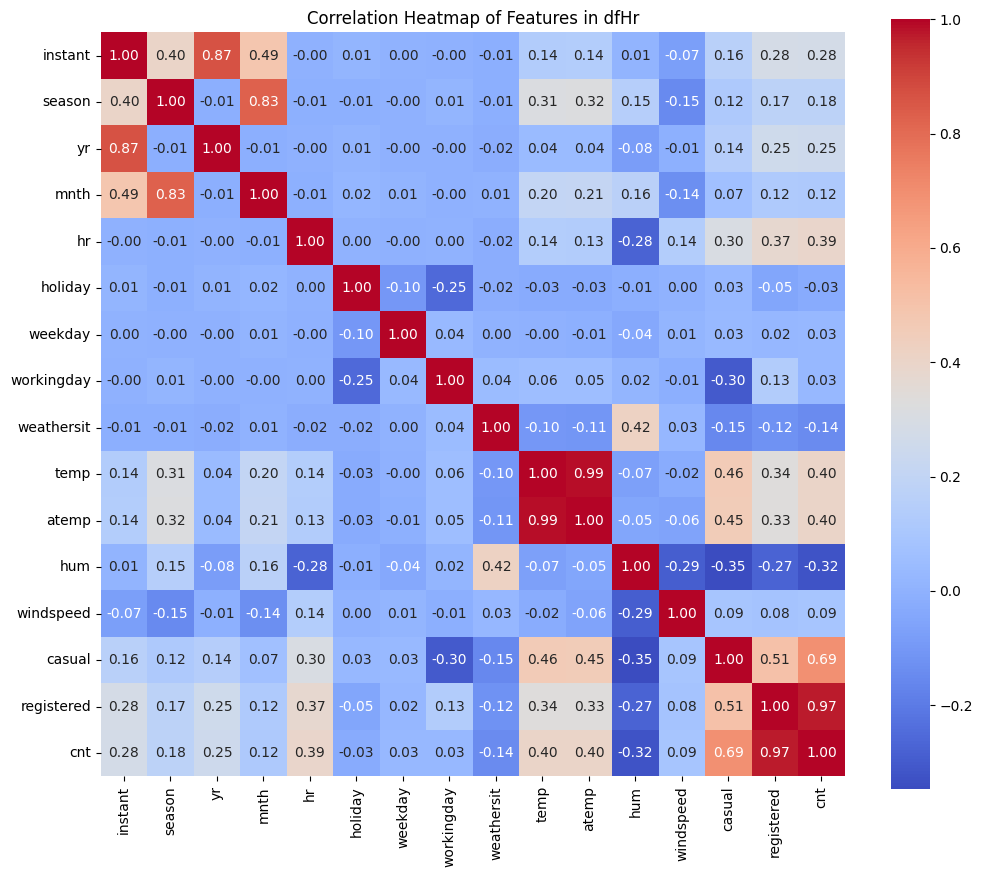

In [ ]:
# YOUR CODE HERE
dfHr_data_corr = dfHr.drop(['dteday'],axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(dfHr_data_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Features in dfHr')
plt.show()



#### Visualize the box plot of casual and registered variables to check the outliers

 registered vs cnt(0.97),temp vs atemp(0.99), month vs season (0.83), instant vs year (0.87)

In [ ]:
#Casual and Registered Outliers Data

def get_outliers_zscore(data):
       z_scores = stats.zscore(data)
       outliers = data[(z_scores < -3) | (z_scores > 3)]
       return outliers

casual_outliers = get_outliers_zscore(dfHr['casual'])
casual_non_outliers = dfHr['casual'][~dfHr['casual'].isin(casual_outliers)]

print(casual_outliers )
print (casual_non_outliers )

registered_outliers = get_outliers_zscore(dfHr['registered'])
registered_non_outliers = dfHr['registered'][~dfHr['registered'].isin(registered_outliers)]

print(registered_outliers )
print (registered_non_outliers )

2128     219
2129     240
2631     205
2632     197
2775     185
        ... 
16174    260
16458    186
16459    224
16460    240
16461    233
Name: casual, Length: 467, dtype: int64
0         3
1         8
2         5
3         3
4         0
         ..
17374    11
17375     8
17376     7
17377    13
17378    12
Name: casual, Length: 16912, dtype: int64
10359    623
10382    614
10383    638
10397    628
10406    642
        ... 
16909    670
16933    655
16957    623
17053    652
17077    665
Name: registered, Length: 371, dtype: int64
0         13
1         32
2         27
3         10
4          1
        ... 
17374    108
17375     81
17376     83
17377     48
17378     37
Name: registered, Length: 17008, dtype: int64


In [ ]:
# YOUR CODE HERE
#dfHr.boxplot(column=['casual', 'registered'])

import plotly.express as px

fig_casual = px.box(dfHr, y="casual", points="all")  # points="all" to show all points as outliers
fig_casual.show()

fig_registered = px.box(dfHr, y="registered", points="all")  # points="all" to show all points as outliers
fig_registered.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# YOUR CODE HERE
# registered vs cnt(0.97),temp vs atemp(0.99), month vs season (0.83), instant vs year (0.87)
#cnt is a calculted filed and when required we can get it
dfHr.drop(['temp','instant', 'windspeed' ,'dteday'], axis=1, inplace=True)

#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE
# Identify categorical variables (typically dtype 'object' or limited unique values)
categorical_variables = dfHr.select_dtypes(include=['object', 'category']).columns.tolist()

# Add numerical variables with few unique values (likely categorical)
for col in dfHr.select_dtypes(include=['int64', 'float64']).columns:
    if dfHr[col].nunique() < 24:  # Arbitrary threshold for categorical features
        categorical_variables.append(col)

# Identify continuous variables (numeric and not categorical)
continuous_variables = [
    col for col in dfHr.select_dtypes(include=['int64', 'float64']).columns
    if col not in categorical_variables
]

# Display results
print("Categorical Variables:", categorical_variables)
print("Continuous Variables:", continuous_variables)


Categorical Variables: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Continuous Variables: ['hr', 'atemp', 'hum', 'casual', 'registered', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the continuous variables
continuous_vars =  ['hr', 'atemp', 'hum', 'casual', 'registered', 'cnt']

# Fit the scaler to the continuous variables

scaled_dfHr = dfHr.copy()
scaler.fit(scaled_dfHr[continuous_vars])

# Transform the continuous variables
scaled_dfHr[continuous_vars] = scaler.transform(scaled_dfHr[continuous_vars])
print("Normalized data : " , scaled_dfHr[continuous_vars])

Normalized data :               hr   atemp   hum    casual  registered       cnt
0      0.000000  0.2879  0.81  0.008174    0.014673  0.015369
1      0.043478  0.2727  0.80  0.021798    0.036117  0.039959
2      0.086957  0.2727  0.80  0.013624    0.030474  0.031762
3      0.130435  0.2879  0.75  0.008174    0.011287  0.012295
4      0.173913  0.2879  0.75  0.000000    0.001129  0.000000
...         ...     ...   ...       ...         ...       ...
17374  0.826087  0.2576  0.60  0.029973    0.121896  0.120902
17375  0.869565  0.2576  0.60  0.021798    0.091422  0.090164
17376  0.913043  0.2576  0.60  0.019074    0.093679  0.091189
17377  0.956522  0.2727  0.56  0.035422    0.054176  0.061475
17378  1.000000  0.2727  0.65  0.032698    0.041761  0.049180

[17379 rows x 6 columns]


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your categorical variables are:
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create a OneHotEncoder object with sparse=False for a dense output
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for DataFrame output

# Fit the encoder to the categorical variables
encoder.fit(dfHr[categorical_vars])

# Transform the categorical variables into one-hot encoded features
encoded_features = encoder.transform(dfHr[categorical_vars])

# Create a DataFrame from the encoded features with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_vars))

# Concatenate the encoded features with the original DataFrame
scaled_dfHr = pd.concat([scaled_dfHr, encoded_df], axis=1)
print(scaled_dfHr.columns.tolist())
# Drop the original categorical columns
#dfHr.drop(categorical_vars, axis=1, inplace=True)

#By using one-hot encoding, we are creating a numerical representation of categorical
#variables without introducing any artificial ordering or weighting.
#This is crucial for many machine learning algorithms that work best with numerical data.

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']


In [ ]:
print(categorical_vars)
dfHr.columns
dfHr.head()

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.2879,0.81,3,13,16
1,1,0,1,1,0,6,0,1,0.2727,0.80,8,32,40
2,1,0,1,2,0,6,0,1,0.2727,0.80,5,27,32
3,1,0,1,3,0,6,0,1,0.2879,0.75,3,10,13
4,1,0,1,4,0,6,0,1,0.2879,0.75,0,1,1


#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
# Assuming 'casual' and 'registered' are NOT your target variables
# and all other columns EXCEPT 'dteday' are your features
features = dfHr.drop(['dteday', 'casual', 'registered'], axis=1)
target = dfHr[['casual', 'registered', 'cnt']]  # Or dfHr['cnt'] if you have 'cnt'

# If 'casual' and 'registered' ARE your target variables:
# features = dfHr.drop(['dteday', 'casual', 'registered'], axis=1)
# target = dfHr[['casual', 'registered']]

print(features)
print("================")
print(target)

KeyError: "['dteday'] not found in axis"

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
from scipy.linalg import lstsq  # For normal equation
# 1. Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target['cnt'], test_size=0.2, random_state=42
)  # Adjust test_size and random_state as needed


# 2. Find coefficients using the normal equation
# theta = (X^T X)^-1 * X^T * y
theta, _, _, _ = lstsq(X_train.values, y_train.values)  # Using lstsq from scipy.linalg

# Print the coefficients
print("Coefficients (Normal Equation):", theta)


# (Optional) 3. Implement batch gradient descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs batch gradient descent to find optimal coefficients.

    Args:
        X: Input features (NumPy array).
        y: Target variable (NumPy array).
        learning_rate: Learning rate for gradient descent.
        iterations: Number of iterations to run.

    Returns:
        theta: Optimal coefficients (NumPy array).
    """
    m = len(y)  # Number of samples
    theta = np.zeros(X.shape[1])  # Initialize coefficients

    for _ in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Calculate error
        error = predictions - y

        # Update coefficients
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradient

    return theta

# # Example usage:
# theta_bgd = batch_gradient_descent(X_train.values, y_train.values)
# print("Coefficients (Batch Gradient Descent):", theta_bgd)


# (Optional) 4. SGD Regressor from sklearn
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train, y_train)

# Print the coefficients
print("Coefficients (SGD Regressor):", sgd_regressor.coef_)

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
import numpy as np
from scipy.linalg import lstsq

# Assuming you have X_train (features) and y_train (target)
# from the previous code (splitting the dataset)

# Calculate the coefficients using the normal equation
theta, residuals, rank, singular_values = lstsq(X_train, y_train)

# Print the coefficients
print("Coefficients (Normal Equation):", theta)

# You can now use these coefficients to make predictions:
# predictions = X_test.dot(theta)

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
# YOUR CODE HERE
import numpy as np

def batch_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Performs batch gradient descent to find optimal coefficients.

    Args:
        X: Input features (NumPy array).
        y: Target variable (NumPy array).
        learning_rate: Learning rate for gradient descent.
        iterations: Number of iterations to run.

    Returns:
        theta: Optimal coefficients (NumPy array).
        cost_history: List of cost values during iterations.
    """
    m = len(y)  # Number of samples
    theta = np.random.randn(X.shape[1])  # Initialize coefficients randomly
    cost_history = []

    for _ in range(iterations):
        # Calculate predictions
        predictions = X.dot(theta)

        # Calculate error
        error = predictions - y

        # Calculate cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        # Update coefficients
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradient

    return theta, cost_history

# Example usage:
# X = X_train.values  # Assuming X_train is your features DataFrame
# y = y_train.values  # Assuming y_train is your target Series
# theta_bgd, cost_history = batch_gradient_descent(X, y)
# print("Coefficients (Batch Gradient Descent):", theta_bgd)

# You can plot the cost history to see how it decreases over iterations:
# import matplotlib.pyplot as plt
# plt.plot(cost_history)
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.title("Cost History")
# plt.show()

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# 1. Create a Linear Regression object
model = LinearRegression()

# 2. Fit the model to the training data
model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Calculate the error (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import r2_score

# Assuming you have y_test (actual values) and y_pred (predicted values)

r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained LinearRegression object

# Get feature names and coefficients
feature_names = X_train.columns
coefficients = model.coef_

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(feature_names, coefficients)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


# Sort features by importance (absolute value of coefficients)
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Print features in order of importance
print("Features in order of importance:")
for feature, coefficient in zip(sorted_features, sorted_coefficients):
    print(f"{feature}: {coefficient:.4f}")

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, y_test from previous steps
# and 'alpha' is a list of alpha values to try

# Initialize variables to store best results
best_alpha = None
best_mse = float('inf')  # Initialize with a very large value
best_r2 = -1  # Initialize with a very small value

# Iterate through alpha values
for alpha_val in alpha:
    # Create a Lasso Regression object
    lasso_model = Lasso(alpha=alpha_val)

    # Fit the model to the training data
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lasso_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

In [ ]:
# YOUR CODE HERE

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
